<a href="https://colab.research.google.com/github/arminsoltan/mohaymen/blob/main/Phase05/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /content/ham
!unrar x "/content/drive/MyDrive/Mohaymen/Phase05/HAM2.rar" "/content/ham"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Mohaymen/Phase05/HAM2.rar

Creating    /content/ham/HAM2                                         OK
Creating    /content/ham/HAM2/1996                                    OK
Extracting  /content/ham/HAM2/1996/hamshahri.dtd                           0%  OK 
Creating    /content/ham/HAM2/1997                                    OK
Extracting  /content/ham/HAM2/1997/hamshahri.dtd                           0%  OK 
Creating    /content/ham/HAM2/1998                                    OK
Extracting  /content/ham/HAM2/1998/hamshahri.dtd                           0%  OK 
Creating    /content/ham/HAM2/1999                                    OK
Extracting  /content/ham/HAM2/1999/hamshahri.dtd                           0%  OK 
Creating    /content/ham/HAM2/2000                                    OK
Extracting  /content/ham/HAM2/2000/hamshahri.dtd           

In [ ]:
# !rm -r "/content/ham"

rm: cannot remove '/content/ham': No such file or directory


In [ ]:
# import os
# original_path = '/content/ham/HAM2'
# directories = os.listdir(original_path)
# files = list()
# index = 0
# for dir in directories:
#   path = original_path + '/' + dir
#   files = os.listdir(path)
#   for index, file in enumerate(files):
#     os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.csv'])))

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

data = pd.read_csv("/content/ham/HAM2/1996/0.csv", error_bad_lines=False)
data


In [ ]:
!rm -r /content/ham_csv

In [ ]:
!mkdir "/content/ham_csv"
!mkdir "/content/ham_csv/HAM2"
!mkdir "/content/ham_csv/HAM2/1998"

In [ ]:
from xml.etree import ElementTree as ET
import pandas as pd
import os

path = '/content/ham/HAM2/1998'
csv_path = '/content/ham_csv/HAM2/1998'
cnt = 0
df = pd.DataFrame()
files = os.listdir(path)
for index, file in enumerate(files):
  if "xml" not in file:
    continue
  try:
    tree = ET.parse(os.path.join(path, file))
  except Exception as err:
    print(file, err)
    continue
  root = tree.getroot()
  df2 = {}
  for doc in root:
    for child in doc:
      if child.tag == 'TEXT':
        df2['content'] = child.text
      if child.tag == 'TITLE':
        df2['title'] = child.text
      if child.tag == 'CAT' and child.items()[0][1] == 'fa':
        df2['category'] = child.text

    df2["year"] = "1998"
    df = df.append(df2, ignore_index=True)

df = df.replace('\n', '', regex=True)
df.to_csv(csv_path+"/"+str(0)+".csv")
df

,year,category,content,title
0,1998,NaN,NaN,NaN
1,1998,ادب و هنر,,آيا به سينما وفادار خواهندماند؟
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...
4,1998,اجتماعی,,كداميك از استرس ها بيماري زاهستند؟
...,...,...,...,...
19958,1998,ورزش,,پس از يك دهه حضور موفق درپيرمرد دووميداني دوها...
19959,1998,ورزش,سومين همايش بزرگ فرهنگي ورزشي با ويلچر جانبازا...,همايش فرهنگي ورزشي جانبازان
19960,1998,ورزش,سرويس ورزشي: پيكارهاي جام جهاني تكواندو روز گذ...,جام جهاني تكواندو- آلمان خداداد و مقانلو بر حر...
19961,1998,ورزش,سرويس ورزشي: تيم ملي كشتي فرنگي دانشجويان ايرا...,كشتي دانشجويان جهان - تركيه تيم فرنگي سوم شد، ...


In [ ]:
data = pd.read_csv("/content/ham_csv/HAM2/1998/0.csv")

In [ ]:
data

,Unnamed: 0,year,category,content,title
0,0,1998,NaN,NaN,NaN
1,1,1998,ادب و هنر,NaN,آيا به سينما وفادار خواهندماند؟
2,2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت
3,3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...
4,4,1998,اجتماعی,NaN,كداميك از استرس ها بيماري زاهستند؟
...,...,...,...,...,...
19958,19958,1998,ورزش,NaN,پس از يك دهه حضور موفق درپيرمرد دووميداني دوها...
19959,19959,1998,ورزش,سومين همايش بزرگ فرهنگي ورزشي با ويلچر جانبازا...,همايش فرهنگي ورزشي جانبازان
19960,19960,1998,ورزش,سرويس ورزشي: پيكارهاي جام جهاني تكواندو روز گذ...,جام جهاني تكواندو- آلمان خداداد و مقانلو بر حر...
19961,19961,1998,ورزش,سرويس ورزشي: تيم ملي كشتي فرنگي دانشجويان ايرا...,كشتي دانشجويان جهان - تركيه تيم فرنگي سوم شد، ...


In [ ]:
# data = df.copy(deep=True)

In [ ]:
data = data[data["content"].str.len() > 4]

In [ ]:
# data[data["content"].str.len() > 4]
data.head()

,year,category,content,title
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...
7,1998,علمی فرهنگی,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...
8,1998,علمی فرهنگی,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...
9,1998,علمی فرهنگی,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...


In [ ]:
column = ['سیاسی', 'ورزش', 'اقتصاد', 'علمی فرهنگی', 'اجتماعی', 'ادب و هنر']
data = data.loc[data['category'].isin(column)]

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data.head()

,year,category,content,title
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...
7,1998,علمی فرهنگی,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...
8,1998,علمی فرهنگی,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...
9,1998,علمی فرهنگی,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...


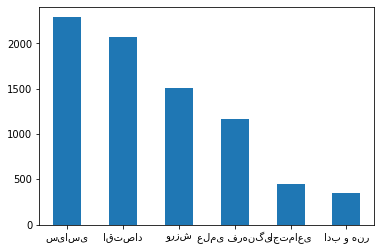

In [ ]:
data['category'].value_counts().plot.bar(rot=0)

In [ ]:
data['category'].value_counts()

سیاسی          2287
اقتصاد         2072
ورزش           1506
علمی فرهنگی    1169
اجتماعی         452
ادب و هنر       349
Name: category, dtype: int64

In [ ]:
import string
string.whitespace
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
!pip install parsivar 
!pip install hazm

     |████████████████████████████████| 36.2 MB 63 kB/s 
     |████████████████████████████████| 1.5 MB 30.3 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492971 sha256=c5fbf939745344933661ea13d4112c91950f4664efb61d8e67536229ddb689fe
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449922 sha256=8090ba6fc502147969d39162025c12104935ffdf85ace15d81ab2f4da8be2b15
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 316 kB 8.3 MB/s 
     |████████████████████████████████| 1.4 MB 50.2 MB/s 
     |████████████████████████████████| 233 kB 36.8 MB/s 
  Created wheel 

# Data preprocessing

In [ ]:
import re
from parsivar import Normalizer, Tokenizer, FindStems
def preprocessing(content, stopword):
  content = re.sub("گروه اجتماعي:", "", content)
  content = re.sub("گروه سياسي:", "", content)
  content = re.sub("واحد رسانه هاي خارجي:", "", content)
  content = re.sub("گروه ادب و هنر:", "", content)
  content = re.sub("گروه علمي فرهنگي:", "", content)
  content = re.sub("گروه ورزشي:", "", content)
  content = re.sub("گروه اقتصادي:", "", content)

  content = filter(lambda ch: ch in string.whitespace or ch not in string.printable, content)
  content = ''.join(ch for ch in list(content))

  normalizer = Normalizer()
  content = normalizer.normalize(content)

  tokenizer = Tokenizer()
  words = tokenizer.tokenize_words(content)

  words_without_stopword = filter(lambda ch: ch not in stopwords, words)
  words_without_stopwords = list(words_without_stopword)

  stemmer = FindStems()
  content = list()
  for word in words_without_stopwords:
    content.append(stemmer.convert_to_stem(word))
  
  content = ' '.join(content)
  
  return content



In [ ]:
!pip install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.5.2-py3-none-any.whl size=18398 sha256=b62ace6a062060415c13612a0888206a06bbf73bd63e61be53cff722ac18b728
  Stored in directory: /root/.cache/pip/wheels/b5/6d/51/9ece2eaf007ea3f7fb0ce053c5773b2eb0d308887da3af12c1
Successfully built pandarallel


In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
file = open("/content/drive/MyDrive/Mohaymen/Phase05/stopwords.txt")
stopwords = file.read().splitlines()
file.close()

In [ ]:
data["new_content"] = data['content'].parallel_apply(lambda content: preprocessing(content, stopwords))

In [ ]:
data.head()

,year,category,content,title,new_content
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت,سرویس ادب هنر اوکتاویو پاز شاعر نویسنده مشهورم...
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...,بهار سرزمین شکوفه باران امتداد ناامید عشق ضریح...
7,1998,علمی فرهنگی,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...,خانه تاریخی صالح ورثه مرحوم میرزاحسن خان مبصرا...
8,1998,علمی فرهنگی,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...,سرویس علمی فرهنگی جشنواره فرهنگی هنری دانشجو س...
9,1998,علمی فرهنگی,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...,سرویس علمی فرهنگی نتایج نهایی آزمون سراسری دان...


In [ ]:
!pip install wordcloud-fa

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud_fa import WordCloudFa

In [ ]:
data[data["category"] == "ورزش"]

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

sport_df = data[data["category"] == "ورزش"]
sport_content = ' '.join(content for content in sport_df["new_content"])
# print(sport_content)
mask_array = np.array(Image.open("/content/iran.png"))

wordcloud = WordCloudFa(mask=mask_array, background_color='white').generate(sport_content)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data.to_pickle("/content/drive/MyDrive/Mohaymen/Phase05/data.pkl")

In [1]:
!pip install parsivar
!pip install hazm
!pip install wordcloud-fa

     |████████████████████████████████| 36.2 MB 62 kB/s 
     |████████████████████████████████| 1.5 MB 36.5 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492971 sha256=9371d16e5f0f8e1af3aac494b1f618280d5d8ec139775c681991b9c8d092a428
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449923 sha256=f94fdd70e29395cc14ef6201b00809561c6f030dd676cb0661670de10177e92e
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 316 kB 11.3 MB/s 
     |████████████████████████████████| 233 kB 34.4 MB/s 
     |████████████████████████████████| 1.4 MB 33.9 MB/s 
  Created wheel

In [2]:
import pandas as pd
from parsivar import Normalizer, Tokenizer, FindStems
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud_fa import WordCloudFa

In [3]:
data = pd.read_pickle("/content/drive/MyDrive/Mohaymen/Phase05/data.pkl")

In [4]:
data.head()

,year,category,content,title,new_content
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت,سرویس ادب هنر اوکتاویو پاز شاعر نویسنده مشهورم...
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...,بهار سرزمین شکوفه باران امتداد ناامید عشق ضریح...
7,1998,علمی فرهنگی,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...,خانه تاریخی صالح ورثه مرحوم میرزاحسن خان مبصرا...
8,1998,علمی فرهنگی,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...,سرویس علمی فرهنگی جشنواره فرهنگی هنری دانشجو س...
9,1998,علمی فرهنگی,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...,سرویس علمی فرهنگی نتایج نهایی آزمون سراسری دان...


In [5]:
data["category"]

2          ادب و هنر
3          ادب و هنر
7        علمی فرهنگی
8        علمی فرهنگی
9        علمی فرهنگی
            ...     
19956          سیاسی
19957          سیاسی
19959           ورزش
19960           ورزش
19961           ورزش
Name: category, Length: 7835, dtype: object

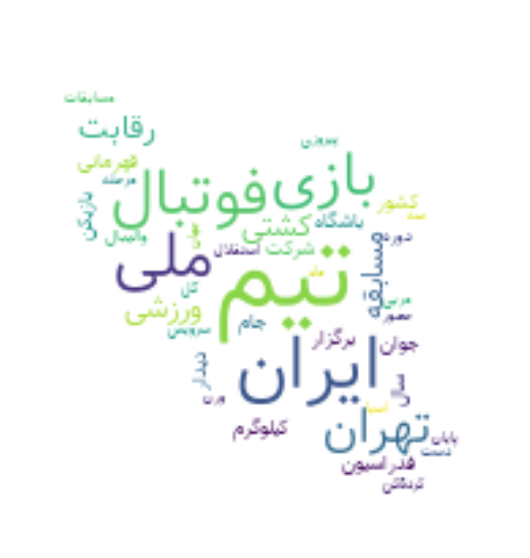

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

sport_df = data[data["category"] == "ورزش"]
sport_content = ' '.join(content for content in sport_df["new_content"])


# print(sport_content)
mask_array = np.array(Image.open("/content/drive/MyDrive/Mohaymen/Phase05/iran.png"))

wordcloud_sport = WordCloudFa(mask=mask_array, background_color='white', collocations=False).generate(sport_content)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_sport, interpolation='bilinear')
plt.axis('off')
plt.show()

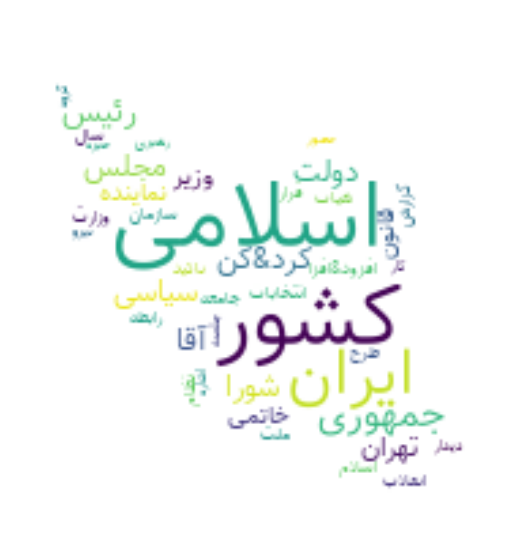

In [7]:
politic_df = data[data["category"] == "سیاسی"]
politic_content = ' '.join(content for content in politic_df["new_content"])
wordcloud_politic = WordCloudFa(mask=mask_array, background_color='white', collocations=False).generate(politic_content)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_politic, interpolation='bilinear')
plt.axis('off')
plt.show()

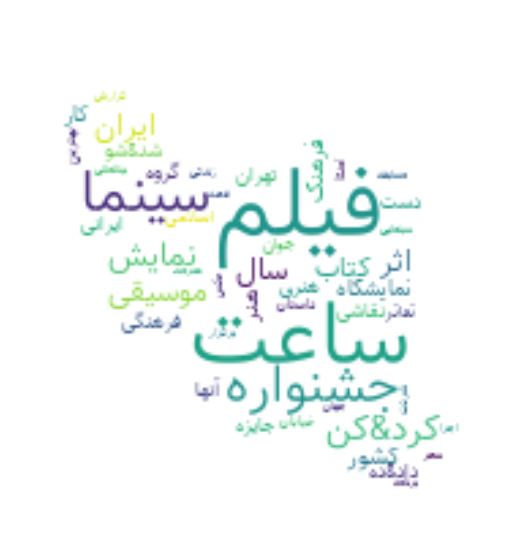

In [8]:
art_df = data[data["category"] == "ادب و هنر"]
art_content = ' '.join(content for content in art_df["new_content"])
wordcloud_art = WordCloudFa(mask=mask_array, background_color='white', collocations=False).generate(art_content)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_art, interpolation='bilinear')
plt.axis('off')
plt.show()

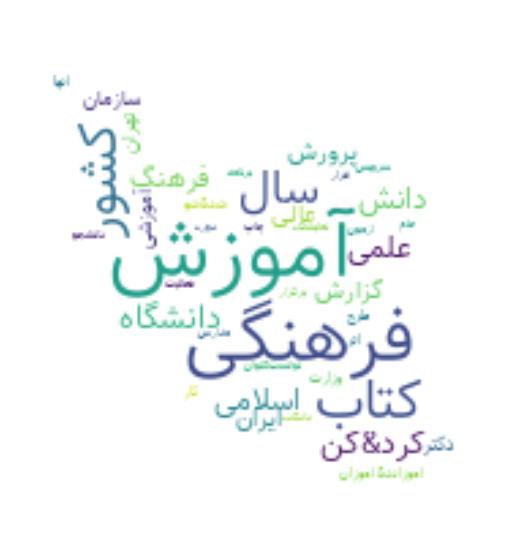

In [9]:
science_df = data[data["category"] == "علمی فرهنگی"]
science_content = ' '.join(content for content in science_df["new_content"])
wordcloud_science = WordCloudFa(mask=mask_array, background_color='white', collocations=False).generate(science_content)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_science, interpolation='bilinear')
plt.axis('off')
plt.show()

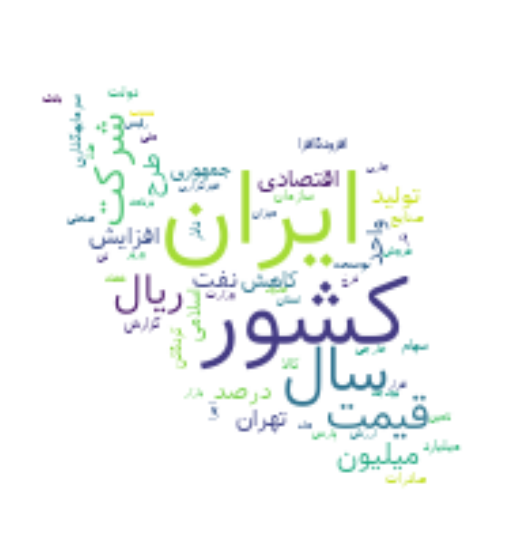

In [10]:
economy_df = data[data["category"] == "اقتصاد"]
economy_content = ' '.join(content for content in economy_df["new_content"])
wordcloud_economy = WordCloudFa(mask=mask_array, background_color='white', collocations=False).generate(economy_content)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_economy, interpolation='bilinear')
plt.axis('off')
plt.show()

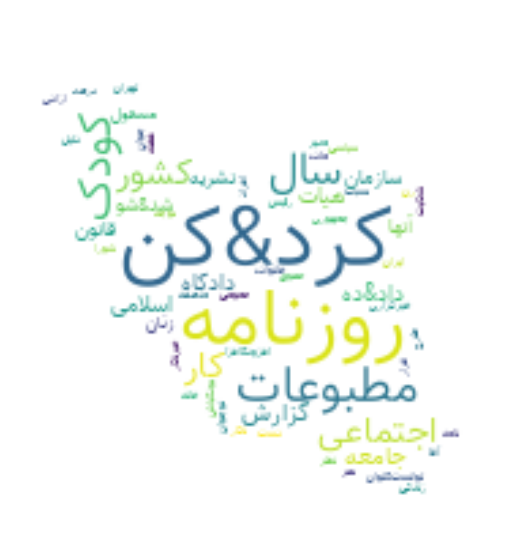

In [11]:
society_df = data[data["category"] == "اجتماعی"]
society_content = ' '.join(content for content in society_df["new_content"])
wordcloud_society = WordCloudFa(mask=mask_array, background_color='white', collocations=False).generate(society_content)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_society, interpolation='bilinear')
plt.axis('off')
plt.show()

# split test and train data

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['category'] = le.fit_transform(data['category'])

In [13]:
data.head()

,year,category,content,title,new_content
2,1998,1,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت,سرویس ادب هنر اوکتاویو پاز شاعر نویسنده مشهورم...
3,1998,1,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...,بهار سرزمین شکوفه باران امتداد ناامید عشق ضریح...
7,1998,4,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...,خانه تاریخی صالح ورثه مرحوم میرزاحسن خان مبصرا...
8,1998,4,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...,سرویس علمی فرهنگی جشنواره فرهنگی هنری دانشجو س...
9,1998,4,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...,سرویس علمی فرهنگی نتایج نهایی آزمون سراسری دان...


In [14]:
print(le.inverse_transform([0, 1, 2, 3, 4, 5]))

['اجتماعی' 'ادب و هنر' 'اقتصاد' 'سیاسی' 'علمی فرهنگی' 'ورزش']


In [15]:
import torch
import torchtext

SEED = 100
torch.manual_seed(SEED)

In [16]:
X = data['new_content']
Y = data['category']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [18]:
train_data = pd.concat([X_train, y_train], axis=1)
valid_data = pd.concat([X_valid, y_valid], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv

<bound method NDFrame.to_csv of                                              new_content  category
15983  توکیو خبرگزاری جمهوری اسلامی آکیرا کوروساواکار...         1
10617  بازار بورس تهران میلیون سهم ارزش چهارمیلیارد م...         2
9847   سرویس ورزشی تیم فوتبال نوجوان ایران برابرتیم م...         5
3919   سرویس سیاسی دنبال وقوع زلزله شمال افغانستان پی...         3
13338  پرقدرت اسیدی هدف ارتقا کیفیت تولید داخلی بازار...         2
...                                                  ...       ...
19499  آگاهی جامعه رخداد پیرامون جوهره کار خبرنگار خط...         3
7401   عمرو موسی وزیر خارجه مصر لزوم نزدیکی کشور عربی...         3
7193   سرویس ورزشی فدراسیون فوتبال ازبکستان دسپلو برز...         5
7492   سرویس ورزشی گذشت سیزده هفته مسابقه بسکتبال قهر...         5
8213   وکیل مدافع آقا غلامحسین کرباس شهردارتهران اگرق...         3

[5014 rows x 2 columns]>

In [19]:
train_data.head()

,new_content,category
15983,توکیو خبرگزاری جمهوری اسلامی آکیرا کوروساواکار...,1
10617,بازار بورس تهران میلیون سهم ارزش چهارمیلیارد م...,2
9847,سرویس ورزشی تیم فوتبال نوجوان ایران برابرتیم م...,5
3919,سرویس سیاسی دنبال وقوع زلزله شمال افغانستان پی...,3
13338,پرقدرت اسیدی هدف ارتقا کیفیت تولید داخلی بازار...,2


In [20]:
y_pred = list()
y_actual = list()

def base_line(data):
  politics = ["شورا اسلامی", "مجلس شورا", "آقا خاتمی", "جامعه", "دولت", "کشور"]
  economy = ["تولید", "دولت", "کشور", "جمهوری اسلامی", "کاهش", "معافیت"]
  social = ["کشور", "سال", "جامعه", "کار", "مطبوعات", "جامعه"]
  science = ["سال", "کتاب", "آموزش و پرورش", "برنامه", "ارائه", "دانشگاه"]
  sport = ["تیم", "تیم ملی", "بازی", "رقابت", "بازیکن", "سرویس ورزشی"]
  art = ["فیلم", "هنرمند", "موسیقی", "جشنواره", "اثر", "کتاب"]

  def intersection(lst1, lst2):
    return set(lst1).intersection(lst2)

  for content, category in zip(data["new_content"], data["category"]):
    tokenizer = Tokenizer()
    words = tokenizer.tokenize_words(content)

    score = list()
    groups = [politics, economy, social, sport, science, art]
    for group in groups:
      score.append(len(intersection(group, words)))
    
    label_pred = score.index(max(score))
    y_pred.append(label_pred)
    y_actual.append(category)
  
  return y_pred, y_actual

In [21]:
y_pred, y_true = base_line(data)

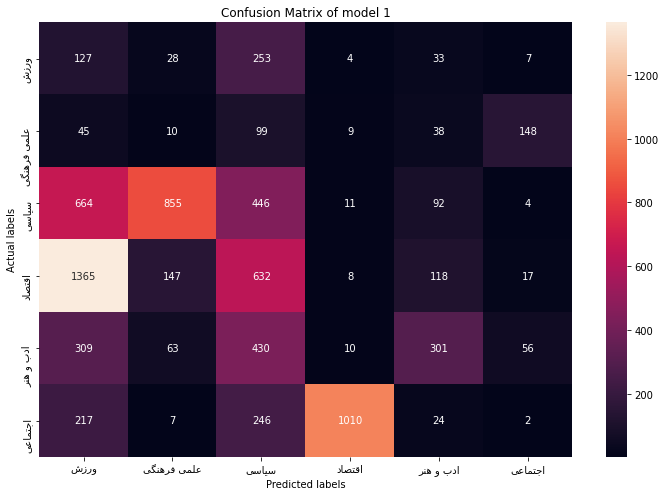

In [22]:
from sklearn import metrics
import seaborn as sns
from bidi.algorithm import get_display
from arabic_reshaper import reshape

classes = ['ورزش', 'علمی فرهنگی', 'سیاسی', 'اقتصاد', 'ادب و هنر', 'اجتماعی']
plt.figure(figsize = (10,7))
ax= plt.subplot()
cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix of model 1'); 
class_names= classes
# set persian names in correct way
class_names = [get_display(reshape(label)) for label in class_names]
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
plt.tight_layout()

In [23]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.05      0.28      0.08       452
           1       0.01      0.03      0.01       349
           2       0.21      0.22      0.21      2072
           3       0.01      0.00      0.00      2287
           4       0.50      0.26      0.34      1169
           5       0.01      0.00      0.00      1506

    accuracy                           0.11      7835
   macro avg       0.13      0.13      0.11      7835
weighted avg       0.14      0.11      0.11      7835



In [24]:
from torchtext.legacy import data
from torch.utils.data import DataLoader

TEXT = data.Field(tokenize='spacy', pad_first=True, fix_length=20)

In [25]:
train_data.head()

,new_content,category
15983,توکیو خبرگزاری جمهوری اسلامی آکیرا کوروساواکار...,1
10617,بازار بورس تهران میلیون سهم ارزش چهارمیلیارد م...,2
9847,سرویس ورزشی تیم فوتبال نوجوان ایران برابرتیم م...,5
3919,سرویس سیاسی دنبال وقوع زلزله شمال افغانستان پی...,3
13338,پرقدرت اسیدی هدف ارتقا کیفیت تولید داخلی بازار...,2


In [26]:
fields = [('new_content', TEXT), ('category', data.Field())]

In [27]:
train_data.to_csv("/content/train_data.csv", index=False)
valid_data.to_csv("/content/valid_data.csv", index=False)
test_data.to_csv("/content/test_data.csv", index=False)

In [28]:
train_data = data.TabularDataset("/content/train_data.csv", format='csv', fields=fields, skip_header=True)
valid_data = data.TabularDataset("/content/valid_data.csv", format='csv', fields=fields, skip_header=True)
test_data = data.TabularDataset("/content/test_data.csv", format='csv', fields=fields, skip_header=True)

In [29]:
TEXT.build_vocab(train_data, valid_data, min_freq=3)

In [30]:
vocab_size = len(TEXT.vocab)
batch_size = 8
embed_dim = 128
num_class = 6

In [31]:
def generate_batch(batch):
  category = torch.tensor([int(entry.category[0]) for entry in batch])

  text_integers = list()
  for entry in batch:
    entry_indexes = list()

    for word in entry.new_content:
      entry_indexes.append(TEXT.vocab.stoi[word])

    text_integers.append(torch.tensor(entry_indexes, dtype=torch.long))
  
  offsets = [0] + [len(entry) for entry in text_integers]

  offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)

  text_integers = torch.cat(text_integers)

  return text_integers, offsets, category

In [32]:
train_loader = DataLoader(train_data, batch_size=batch_size, collate_fn=generate_batch)
valid_loader = DataLoader(valid_data, batch_size=batch_size, collate_fn=generate_batch)
test_loader = DataLoader(test_data, batch_size=batch_size, collate_fn=generate_batch)

In [33]:
import torch.nn as nn
class TextClassificationModel(nn.Module):
  def __init__(self, vocab_size, embed_dim, num_class):
    super(TextClassificationModel, self).__init__()
    self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
    self.fc = nn.Linear(embed_dim, num_class)

    self.init_weights()

  def init_weights(self):
    initrange = 0.5
    self.embedding.weight.data.uniform_(-initrange, initrange)
    self.fc.weight.data.uniform_(-initrange, initrange)
    self.fc.bias.data.zero_()

  def forward(self, text, offsets):
    embedded = self.embedding(text, offsets)
    return self.fc(embedded)

In [34]:
model = TextClassificationModel(vocab_size, embed_dim, num_class)

In [35]:
from torch.optim import lr_scheduler

num_epoch = 10
learning_rate = 0.1

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=learning_rate)
scheduler = lr_scheduler.StepLR(optimizer, 1, gamma=0.9)

n_total_step = len(train_loader)

In [36]:
def class_acc(y_pred, label):
  y_pred_softmax = torch.softmax(y_pred, 1)
  y_pred_tag = torch.max(y_pred_softmax, 1)[1].data.numpy().squeeze()
  label = label.numpy()

  correct = (y_pred_tag == label)
  acc = correct.sum() / len(correct)
  acc = torch.round(torch.tensor(acc) * 100)

  return acc

In [37]:
from tqdm import tqdm 

train_loss, valid_loss = list(), list()
train_acc, valid_acc = list(), list()

def train(train_loader):
  train_epoch_loss = 0
  train_epoch_acc = 0
  model.train()

  loop = tqdm(enumerate(train_loader), total=n_total_step, leave=False)

  for i, (text, offsets, label) in loop:
    y_pred = model(text, offsets)

    loss_train = criterion(y_pred, label)
    acc_train = class_acc(y_pred, label)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    train_epoch_loss += loss_train.item()
    train_epoch_acc += acc_train.item()

  train_loss.append(train_epoch_loss / len(train_loader))
  train_acc.append(train_epoch_acc / len(train_loader))

  return train_loss, train_acc


valid_loss, valid_acc = list(), list()
def evaluate(valid_loader):
  with torch.no_grad():
    model.eval()

    val_epoch_loss = 0
    val_epoch_acc = 0
    
    for text, offsets, label in valid_loader:
      y_pred = model(text, offsets)
      loss_valid = criterion(y_pred, label)
      acc_valid = class_acc(y_pred, label)

      val_epoch_loss += loss_valid.item()
      val_epoch_acc += acc_valid.item()

  valid_loss.append(val_epoch_loss / len(valid_loader))
  valid_acc.append(val_epoch_acc / len(valid_loader))

  return valid_loss, valid_acc

In [38]:
from tqdm import tqdm

for epoch in range(num_epoch):
  train_loss, train_acc = train(train_loader)
  valid_loss, valid_acc = evaluate(valid_loader)
  scheduler.step()

In [39]:
print(train_loss)
print(train_acc)
print(valid_loss)
print(valid_acc)

[0.7412447456561587, 0.5954021416794645, 0.5739749059752461, 0.5619076248644547, 0.5519063909771292, 0.544110252333291, 0.536654065792379, 0.5308353907088533, 0.5246804251946046, 0.5200338865640726]
[74.9505582137161, 79.79744816586921, 80.6634768740032, 80.98086124401914, 81.3444976076555, 81.76076555023923, 82.03508771929825, 82.21212121212122, 82.45135566188198, 82.59011164274322]
[0.6838159677898807, 0.6822594688956145, 0.6857898721269741, 0.6886484334897843, 0.6885065791808116, 0.6883234484892362, 0.6865507700735596, 0.6849649001363736, 0.6827218750859522, 0.6806963818373194]
[76.64331210191082, 76.87898089171975, 76.87898089171975, 76.96178343949045, 76.86624203821655, 77.02547770700637, 77.4267515923567, 77.4267515923567, 77.828025477707, 77.91082802547771]


wandb

Text(0, 0.5, 'accuracy')

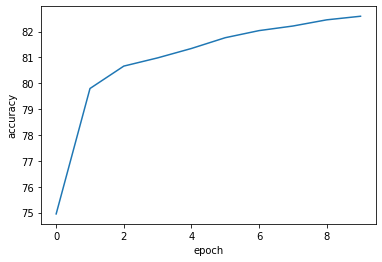

In [40]:
plt.plot(train_acc)
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'accuracy')

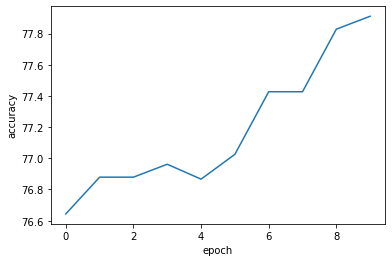

In [41]:
plt.plot(valid_acc)
plt.xlabel("epoch")
plt.ylabel("accuracy")

In [42]:
classes = ['اجتماعی', 'ادب و هنر', 'اقتصاد', 'سیاسی', 'علمی فرهنگی', 'ورزش']

In [43]:
def test(model, test_loader):
  y_pred = []
  y_true = []

  model.eval()
  with torch.no_grad():
    n_true = 0
    n_total = 0
    n_class_correct = [0 for i in range(num_class)]
    n_class_sample = [0 for i in range(num_class)]
  
    for text, offsets, label in test_loader:

      output = model(text, offsets)

      _, y_predtest = torch.max(output,1)

      n_true += (y_predtest == label).sum()
      n_total += label.size(0)

      for i in range(len(y_predtest)):
        y_pred.append(y_predtest[i])
        y_true.append(label[i])

      for i in range(len(y_predtest)):
        lb = label[i]
        pred = y_predtest[i]
        if pred == lb:
          n_class_correct[lb] += 1
        n_class_sample[lb] += 1   

    print(f'accuracy of network on the {len(test_loader)} texts is : {(n_true/n_total) *100}')
  
    for i in range(len(classes)):
      acc = 100.0 * n_class_correct[i] / n_class_sample[i]
      print(f'Accuracy of {classes[i]}: {acc} %')
  
  return y_pred, y_true

In [50]:
y_pred, y_true = test(model, test_loader)

accuracy of network on the 196 texts is : 76.26036834716797
Accuracy of اجتماعی: 48.03921568627451 %
Accuracy of ادب و هنر: 77.58620689655173 %
Accuracy of اقتصاد: 82.96296296296296 %
Accuracy of سیاسی: 74.66960352422907 %
Accuracy of علمی فرهنگی: 63.983050847457626 %
Accuracy of ورزش: 88.14102564102564 %


In [51]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

def confusion_matrix(y_actual_test, y_pred_test):
  
  plt.figure(figsize = (10,7))
  ax= plt.subplot()
  cnf_matrix = metrics.confusion_matrix(y_actual_test, y_pred_test)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g', ax=ax);  

  ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
  ax.set_title('Confusion Matrix of model 1'); 
  class_names= classes

  class_names = [get_display(reshape(label)) for label in class_names]
  ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
  plt.tight_layout()

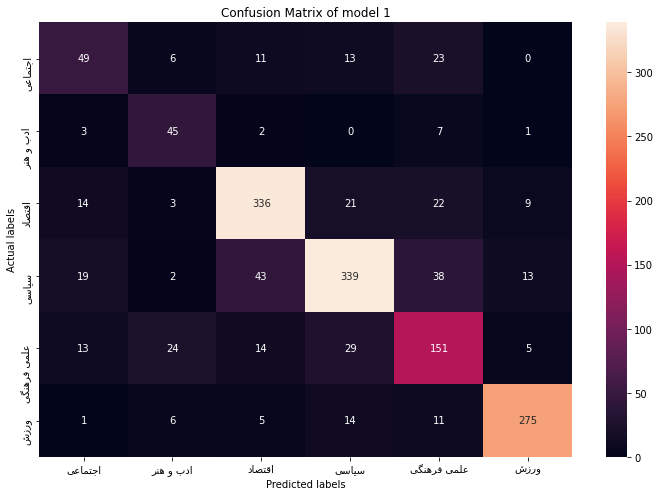

In [52]:
confusion_matrix(y_true, y_pred)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.48      0.49       102
           1       0.52      0.78      0.62        58
           2       0.82      0.83      0.82       405
           3       0.81      0.75      0.78       454
           4       0.60      0.64      0.62       236
           5       0.91      0.88      0.89       312

    accuracy                           0.76      1567
   macro avg       0.69      0.73      0.70      1567
weighted avg       0.77      0.76      0.76      1567

